In [1]:
import numpy as np
import pandas as pd 
data = pd.read_csv('FIFA19.csv')
data.head(5)


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [2]:
print(data.shape)
print(data.columns)
print(data.describe())
print(data.info)

(18147, 58)
Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'League', 'Speciality'],
      dtype='object')
         Unnamed: 0           Age       Overall     Potential  \
count  18147.000000  18147.000000  

The oldest player is O. Pérez and is 45 yrs old. He is from Mexico
The youngest player is W. Geubbels and is 16. He is from France 
Mean age of the players in FIFA 19 is 25.121


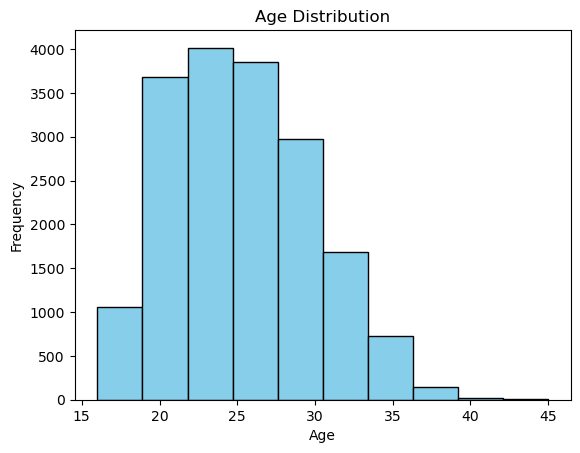

In [3]:
#1) Explore the distribution of player ages and their corresponding overall ratings. 
import matplotlib.pyplot as plt
# Create a histogram for the 'Age' distribution
#plt.figure(figsize=(10, 6))
#plt.subplot(2, 1, 1)
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
old=data.loc[data['Age'].idxmax()]
young= data.loc[data['Age'].idxmin()]
print(f"The oldest player is {old['Name']} and is {old['Age']} yrs old. He is from {old['Nationality']}")
print(f"The youngest player is {young['Name']} and is {young['Age']}. He is from {young['Nationality']} ")
print(f"Mean age of the players in FIFA 19 is {round(data['Age'].mean(),3)}")




Maximum overall rating of 94 is achived at the age of 31 by L. Messi from Argentina 


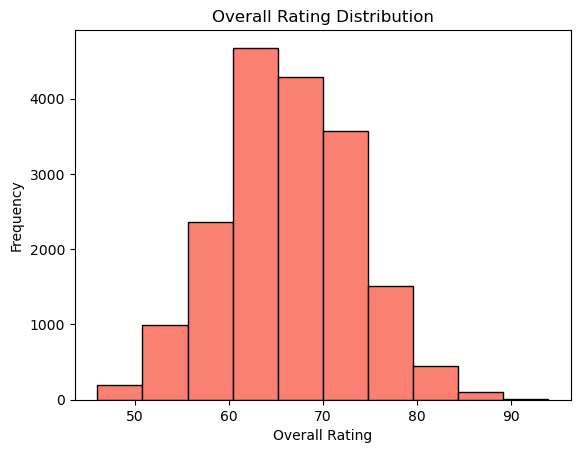

In [4]:
plt.hist(data['Overall'], bins=10, color='salmon', edgecolor='black')
plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
max_rate= data.loc[data['Overall'].idxmax()]
print(f"Maximum overall rating of {max_rate['Overall']} is achived at the age of {max_rate['Age']} by {max_rate['Name']} from {max_rate['Nationality']} ")

Text(0, 0.5, 'Overall Rating')

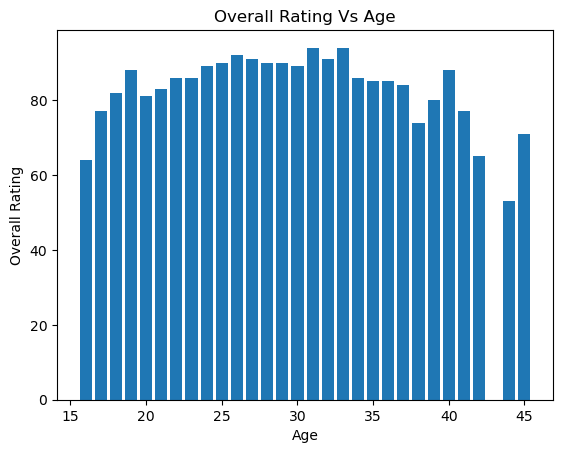

In [5]:

plt.bar(data['Age'],data['Overall'])
plt.title('Overall Rating Vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')


In [6]:
overall_90=data[data['Overall']>90]
print("Players with overall rating above 90 are:\n", overall_90[['Name','Age','Overall','Nationality','Club']].head(10))

Players with overall rating above 90 are:
                 Name  Age  Overall Nationality                 Club
0           L. Messi   31       94   Argentina         FC Barcelona
1  Cristiano Ronaldo   33       94    Portugal             Juventus
2          Neymar Jr   26       92      Brazil  Paris Saint-Germain
3             De Gea   27       91       Spain    Manchester United
4       K. De Bruyne   27       91     Belgium      Manchester City
5          E. Hazard   27       91     Belgium              Chelsea
6          L. Modrić   32       91     Croatia          Real Madrid
7          L. Suárez   31       91     Uruguay         FC Barcelona
8       Sergio Ramos   32       91       Spain          Real Madrid


<Axes: xlabel='Nationality'>

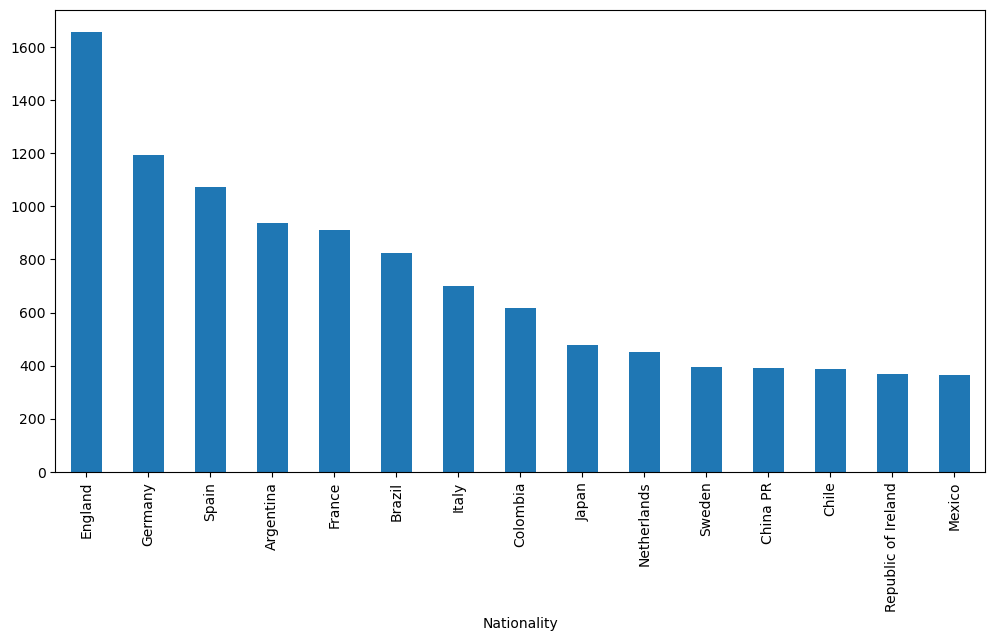

In [36]:

nationality=data.groupby("Nationality").size().sort_values(ascending=False)
nationality.head(15).plot(kind="bar",figsize=(12,6))



Total Countries participating: 164
Total Clubs: 652
Club
Free Agent           229
Manchester United     33
Rayo Vallecano        33
Valencia CF           33
Chelsea               33
                    ... 
Chapecoense           20
Cruzeiro              20
Limerick FC           19
Sligo Rovers          19
Derry City            18
Length: 652, dtype: int64


Text(0.5, 1.0, 'Players in Club')

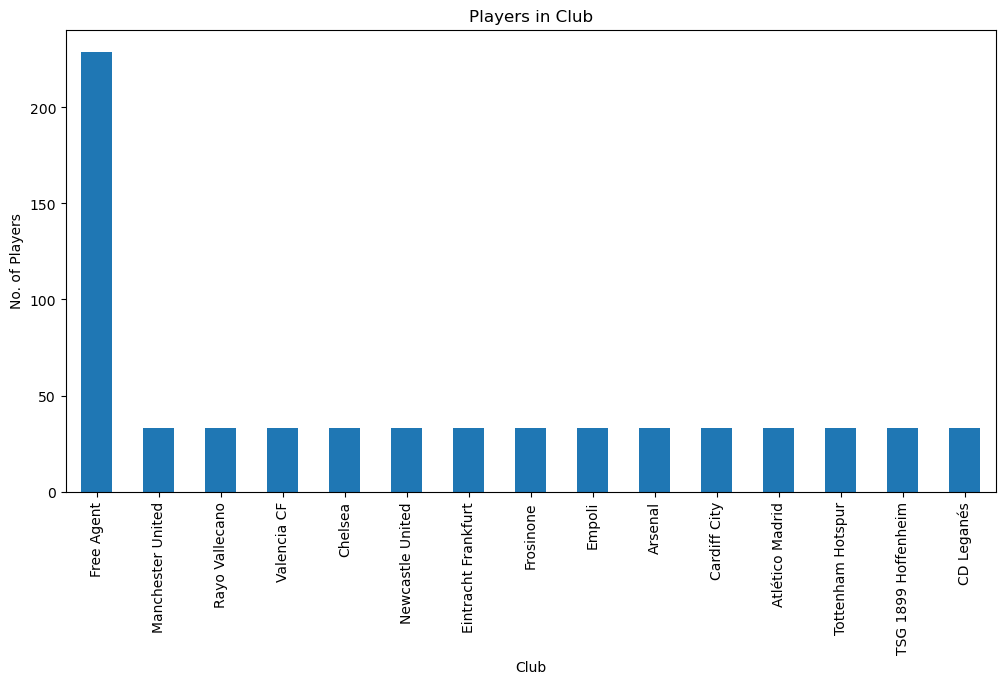

In [37]:
#2) Investigate the distribution of players across different clubs based on their nationality

print("Total Countries participating:",data['Nationality'].nunique())
print("Total Clubs:",data['Club'].nunique())
club=data.groupby("Club").size().sort_values(ascending=False)
print(club)
club.head(15).plot(kind="bar",figsize=(12,6))

plt.xlabel("Club")
plt.ylabel("No. of Players")
plt.title("Players in Club")


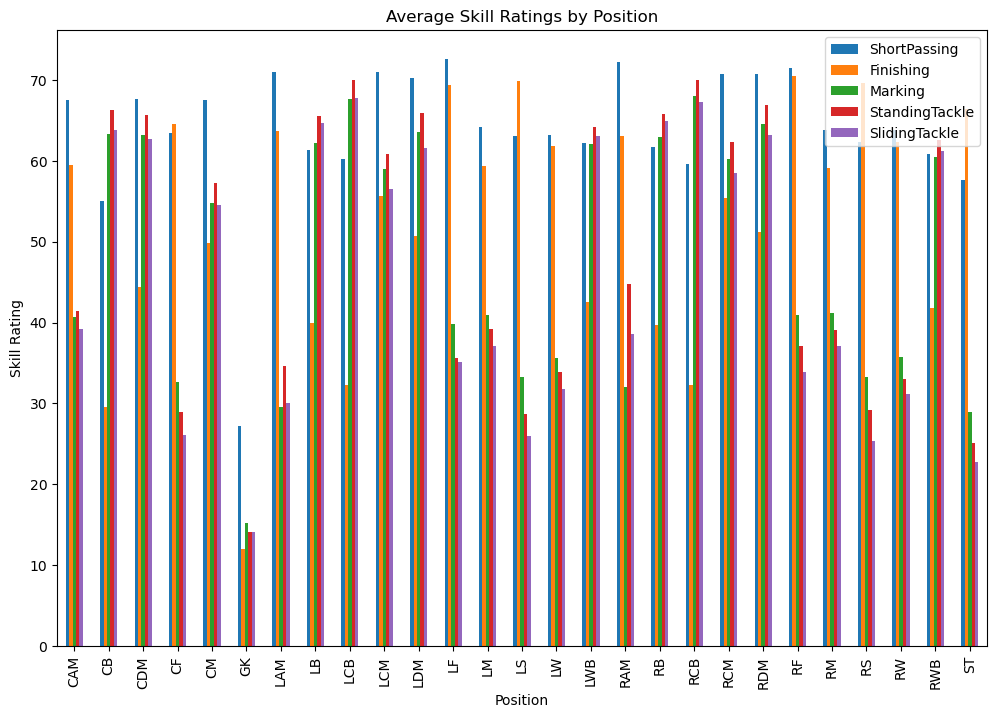

In [51]:
#3) Compare the skill ratings of players in different positions. 
#Identify which positions tend to have higher ratings in attributes like passing, shooting, and defensive skills.
columns_of_interest = ['Position', 'ShortPassing', 'Finishing', 'Marking', 'StandingTackle', 'SlidingTackle']

# Filter the DataFrame to include only the relevant columns
skills = data[columns_of_interest]

# Group the data by 'Position' and calculate the mean for each skill
position_skills = skills.groupby('Position').mean()

# Plot the comparison
position_skills.plot(kind='bar', figsize=(12, 8))
plt.title('Average Skill Ratings by Position')
plt.xlabel('Position')
plt.ylabel('Skill Rating')
plt.show()

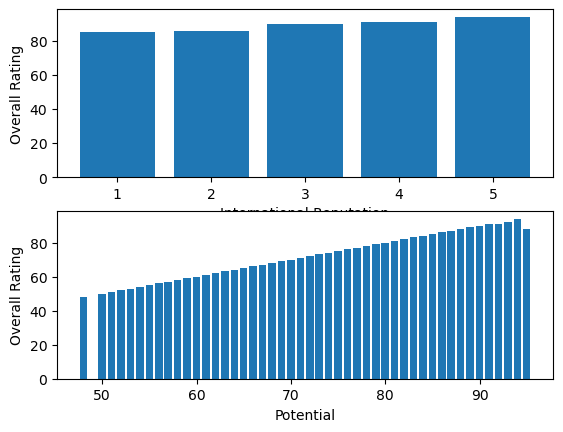

                           Overall  Potential  International Reputation
Overall                   1.000000   0.660947                  0.499596
Potential                 0.660947   1.000000                  0.373024
International Reputation  0.499596   0.373024                  1.000000


In [61]:
#4) Explore the relationship between player attributes (e.g., Overall, Potential, International Reputation)

attributes_of_interest = ['Overall', 'Potential', 'International Reputation']

# Filter the DataFrame to include only the relevant columns
player_attributes = data[attributes_of_interest]
plt.subplot(2,1,1)
plt.bar(data['International Reputation'],data['Overall'])
plt.xlabel("International Reputation")
plt.ylabel("Overall Rating")
plt.subplot(2,1,2)
plt.bar(data['Potential'],data['Overall'])
plt.xlabel("Potential")
plt.ylabel("Overall Rating")


plt.show()

# Correlation matrix
correlation_matrix = player_attributes.corr()
print(correlation_matrix)


In [66]:
#5) Analyze whether there is a correlation between the overall ratings of players and the competitive strength of the league they play in
correlation_coefficient = data.corr( method='pearson')
print(f'Correlation Coefficient: {correlation_coefficient}')


Correlation Coefficient:                           Unnamed: 0       Age   Overall  Potential  \
Unnamed: 0                  1.000000 -0.455940 -0.972778  -0.633200   
Age                        -0.455940  1.000000  0.453354  -0.252259   
Overall                    -0.972778  0.453354  1.000000   0.660947   
Potential                  -0.633200 -0.252259  0.660947   1.000000   
International Reputation   -0.413375  0.253985  0.499596   0.373024   
Weak Foot                  -0.204453  0.059964  0.212464   0.162818   
Skill Moves                -0.415568  0.027814  0.414363   0.354107   
Jersey Number               0.213645 -0.241156 -0.218931  -0.010474   
Crossing                   -0.389973  0.130663  0.394849   0.246188   
Finishing                  -0.325665  0.068789  0.332674   0.243436   
HeadingAccuracy            -0.337551  0.147204  0.340602   0.200665   
ShortPassing               -0.492239  0.133117  0.502275   0.368765   
Volleys                    -0.384398  0.142766  0.39

C:\Users\Sriranjani Ananth\AppData\Local\Temp\ipykernel_5724\2888558116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_coefficient = data.corr( method='pearson')
